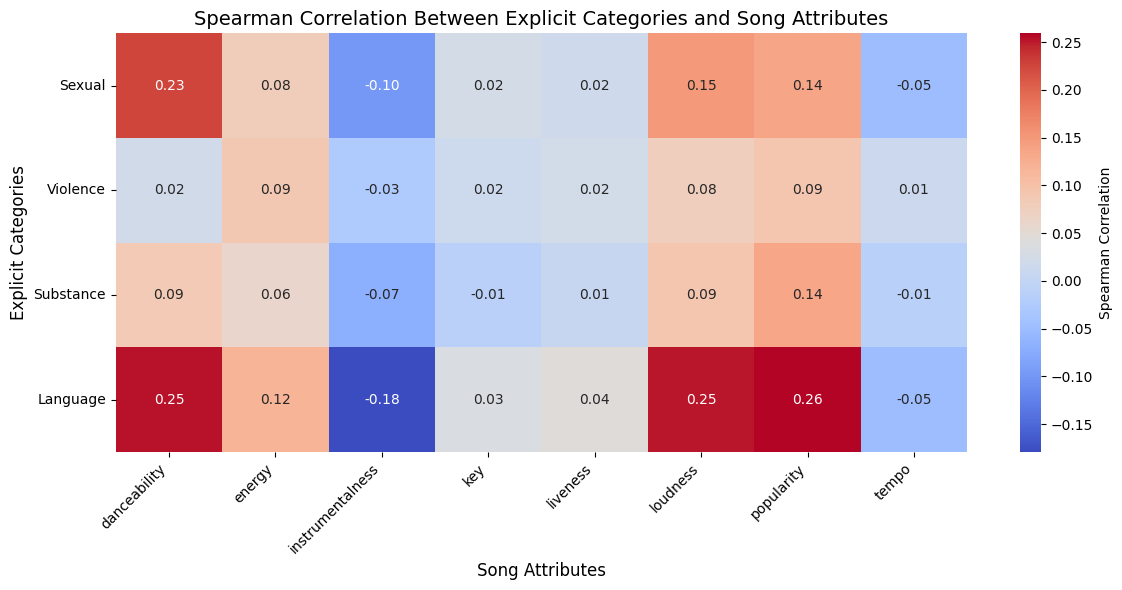

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'billboard-lyrics-spotify_predictions_cleaned.csv'
data = pd.read_csv(file_path)

# Filter rows where any attribute is missing
attributes = ["danceability", "energy", "instrumentalness", "key",
              "liveness", "loudness", "popularity", "tempo"]
filtered_data = data.dropna(subset=attributes)

# Explicit categories
explicit_categories = ["Sexual", "Violence", "Substance", "Language"]

# Compute Spearman correlation
correlation_matrix = filtered_data[explicit_categories + attributes].corr(method='spearman')

# Extract the explicit categories (rows) with song attributes (columns)
heatmap_data = correlation_matrix.loc[explicit_categories, attributes]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Spearman Correlation'}
)
plt.title("Spearman Correlation Between Explicit Categories and Song Attributes", fontsize=14)
plt.xlabel("Song Attributes", fontsize=12)
plt.ylabel("Explicit Categories", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Joint Probability Matrix:
             Sexual  Violence  Substance  Language
Sexual     0.505455  0.024416   0.056623  0.228052
Violence   0.024416  0.165195   0.009870  0.037403
Substance  0.056623  0.009870   0.208312  0.077922
Language   0.228052  0.037403   0.077922  0.475325


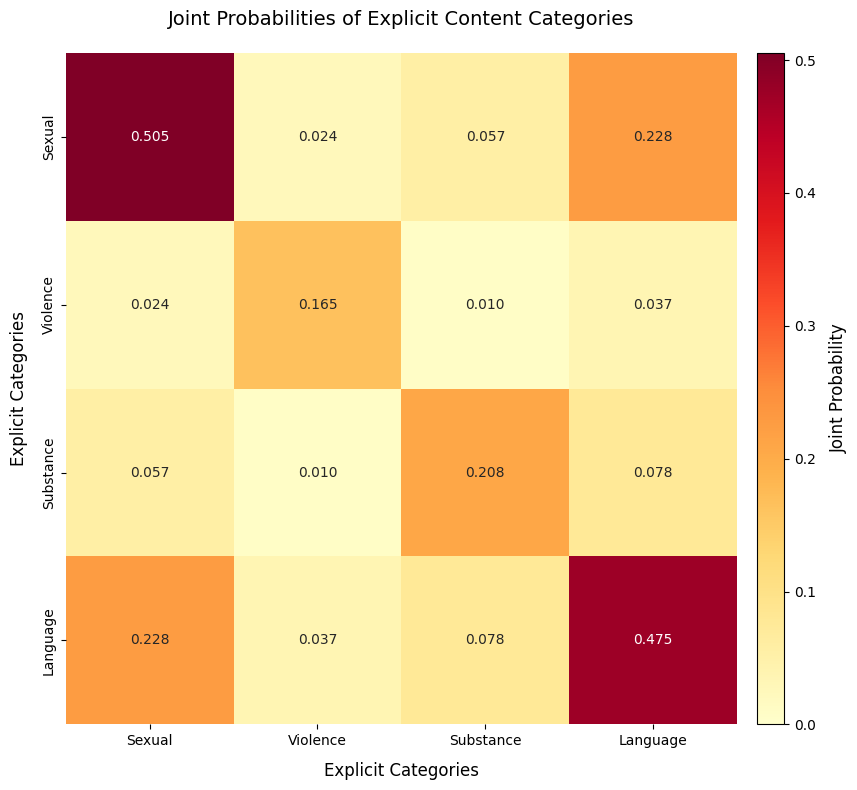

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def analyze_joint_probabilities(data, categories):
    """
    Analyze and visualize joint probabilities between multiple categories

    Parameters:
    data (pd.DataFrame): Input dataset
    categories (list): List of category names to analyze

    Returns:
    tuple: (joint probability matrix, figure)
    """
    # Filter out rows where all categories are 0
    filtered_data = data[data[categories].sum(axis=1) > 0]
    total_songs = filtered_data.shape[0]

    # Calculate individual probabilities for each category
    individual_probs = {cat: (filtered_data[cat] == 1).sum() / total_songs
                       for cat in categories}

    # Initialize joint probability matrix
    joint_prob_matrix = pd.DataFrame(index=categories, columns=categories, dtype=float)

    # Calculate joint probabilities and conditional probabilities
    for cat_a in categories:
      for cat_b in categories:
        if cat_a == cat_b:
          # Diagonal: P(A)
          joint_prob_matrix.loc[cat_a, cat_b] = individual_probs[cat_a]
        else:
          # Off-diagonal: P(A ∩ B)
          joint_count = ((filtered_data[cat_a] == 1) &
                        (filtered_data[cat_b] == 1)).sum()
          joint_prob_matrix.loc[cat_a, cat_b] = joint_count / total_songs

    # Create visualization
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create heatmap with improved aesthetics
    heatmap = sns.heatmap(
      joint_prob_matrix,
      annot=True,
      fmt=".3f",  # Show three decimal places for more precision
      cmap="YlOrRd",  # Changed colormap for better visibility
      cbar=False,
      square=True,
      ax=ax,
      vmin=0,  # Force scale to start at 0
      vmax=max(individual_probs.values())  # Scale to maximum individual probability
    )

    # Add colorbar with better positioning
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.2)
    cbar = fig.colorbar(heatmap.collections[0], cax=cax)
    cbar.set_label("Joint Probability", fontsize=12, labelpad=10)

    # Improve labels and title
    ax.set_title("Joint Probabilities of Explicit Content Categories",
                fontsize=14, pad=20)
    ax.set_xlabel("Explicit Categories", fontsize=12, labelpad=10)
    ax.set_ylabel("Explicit Categories", fontsize=12, labelpad=10)

    plt.tight_layout()

    return joint_prob_matrix, fig

# Usage:
file_path = 'billboard-lyrics-spotify_predictions_cleaned.csv'
data = pd.read_csv(file_path)
categories = ['Sexual', 'Violence', 'Substance', 'Language']

# Run analysis
prob_matrix, fig = analyze_joint_probabilities(data, categories)

# Show results
print("Joint Probability Matrix:")
print(prob_matrix)
plt.show()